In [1]:
import requests
api_key = '57ef9f1b0c834ddaa84db048ca55d05a'

In [2]:
# api_url = 'https://api.twelvedata.com/time_series?symbol=EUR/USD&interval=1day&outputsize=12&apikey=demo&source=docs'

# data = requests.get(api_url).json()

In [3]:
# symbol = 'BTC/USD'
symbol = 'ETH/INR'
interval = '5min'
#order = 'asc'
start_date = '2022-12-12 00:00:00'
end_date = '2022-12-29 00:00:00'
api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={start_date}&end_date={end_date}&interval={interval}&apikey={api_key}'


data = requests.get(api_url).json()
data

{'meta': {'symbol': 'ETH/INR',
  'interval': '5min',
  'currency_base': 'Ethereum',
  'currency_quote': 'Indian Rupee',
  'exchange': 'Synthetic',
  'type': 'Digital Currency'},
 'values': [{'datetime': '2022-12-29 00:00:00',
   'open': '98482.36719',
   'high': '98530.36719',
   'low': '98482.36719',
   'close': '98507.19531'},
  {'datetime': '2022-12-28 23:55:00',
   'open': '98471.60938',
   'high': '98579.19531',
   'low': '98471.60938',
   'close': '98478.22656'},
  {'datetime': '2022-12-28 23:50:00',
   'open': '98383.87500',
   'high': '98431.05469',
   'low': '98362.35938',
   'close': '98431.05469'},
  {'datetime': '2022-12-28 23:45:00',
   'open': '98421.94531',
   'high': '98421.94531',
   'low': '98374.77344',
   'close': '98383.87500'},
  {'datetime': '2022-12-28 23:40:00',
   'open': '98388.01562',
   'high': '98394.63281',
   'low': '98388.01562',
   'close': '98394.63281'},
  {'datetime': '2022-12-28 23:35:00',
   'open': '98400.42969',
   'high': '98416.98438',
   'low

In [4]:
data.keys()

dict_keys(['meta', 'values', 'status'])

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [6]:
df = pd.DataFrame(data['values'])
df

,datetime,open,high,low,close
0,2022-12-29 00:00:00,98482.36719,98530.36719,98482.36719,98507.19531
1,2022-12-28 23:55:00,98471.60938,98579.19531,98471.60938,98478.22656
2,2022-12-28 23:50:00,98383.87500,98431.05469,98362.35938,98431.05469
3,2022-12-28 23:45:00,98421.94531,98421.94531,98374.77344,98383.87500
4,2022-12-28 23:40:00,98388.01562,98394.63281,98388.01562,98394.63281
...,...,...,...,...,...
4891,2022-12-12 00:20:00,103534.74219,103608.09375,103408.64844,103408.64844
4892,2022-12-12 00:15:00,103652.60938,103758.92969,103616.34375,103616.34375
4893,2022-12-12 00:10:00,103940.25000,103940.25000,103678.16406,103678.16406
4894,2022-12-12 00:05:00,103903.99219,103997.95312,103894.92188,103953.43750


In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['close'].values.reshape(-1,1))

In [8]:
scaled_data.shape

(4896, 1)

In [9]:
time_intervals_to_train = 30
prediction_interval = 12

x_train = []
y_train = []

In [10]:
for i in range(time_intervals_to_train, len(scaled_data) - prediction_interval):
  x_train.append(scaled_data[i - time_intervals_to_train: i, 0])
  y_train.append(scaled_data[i + prediction_interval, 0])     

           

In [11]:
x_train = np.array(x_train)
y_train = np.array(y_train) 

In [12]:
x_train.shape

(4854, 30)

In [13]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [14]:
x_train.shape

(4854, 30, 1)

In [15]:
model = Sequential()

model.add(LSTM(128,return_sequences=True, input_shape=(x_train.shape[1],1), activation='relu'))
model.add(Dropout(0.4))
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(Dropout(0.3))
model.add(LSTM(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.compile(loss='mean_squared_error',optimizer='adam', metrics='accuracy')

In [17]:
model.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
76/76 [==============================] - 17s 169ms/step - loss: 0.0192 - accuracy: 4.1203e-04
Epoch 2/10
76/76 [==============================] - 18s 236ms/step - loss: 0.0031 - accuracy: 4.1203e-04
Epoch 3/10
76/76 [==============================] - 10s 127ms/step - loss: 0.0031 - accuracy: 4.1203e-04
Epoch 4/10
76/76 [==============================] - 9s 121ms/step - loss: 0.0028 - accuracy: 4.1203e-04
Epoch 5/10
76/76 [==============================] - 9s 119ms/step - loss: 0.0028 - accuracy: 4.1203e-04
Epoch 6/10
76/76 [==============================] - 9s 114ms/step - loss: 0.0027 - accuracy: 4.1203e-04
Epoch 7/10
76/76 [==============================] - 9s 118ms/step - loss: 0.0026 - accuracy: 4.1203e-04
Epoch 8/10
76/76 [==============================] - 9s 115ms/step - loss: 0.0025 - accuracy: 4.1203e-04
Epoch 9/10
76/76 [==============================] - 9s 116ms/step - loss: 0.0024 - accuracy: 4.1203e-04
Epoch 10/10
76/76 [==============================] - 9s 117ms

In [18]:
test_start_date = '2022-12-12 00:00:00'
test_end_date = '2022-12-29 00:00:00'
test_api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={start_date}&end_date={end_date}&interval={interval}&apikey={api_key}'
test_data = requests.get(test_api_url).json()
test_df = pd.DataFrame(test_data['values'])
test_df

,datetime,open,high,low,close
0,2022-12-29 00:00:00,98482.36719,98530.36719,98482.36719,98507.19531
1,2022-12-28 23:55:00,98471.60938,98579.19531,98471.60938,98478.22656
2,2022-12-28 23:50:00,98383.87500,98431.05469,98362.35938,98431.05469
3,2022-12-28 23:45:00,98421.94531,98421.94531,98374.77344,98383.87500
4,2022-12-28 23:40:00,98388.01562,98394.63281,98388.01562,98394.63281
...,...,...,...,...,...
4891,2022-12-12 00:20:00,103534.74219,103608.09375,103408.64844,103408.64844
4892,2022-12-12 00:15:00,103652.60938,103758.92969,103616.34375,103616.34375
4893,2022-12-12 00:10:00,103940.25000,103940.25000,103678.16406,103678.16406
4894,2022-12-12 00:05:00,103903.99219,103997.95312,103894.92188,103953.43750


In [19]:
test_df['close']

0        98507.19531
1        98478.22656
2        98431.05469
3        98383.87500
4        98394.63281
            ...     
4891    103408.64844
4892    103616.34375
4893    103678.16406
4894    103953.43750
4895    103988.87500
Name: close, Length: 4896, dtype: object

In [20]:
pd.to_numeric(test_df['close'], errors = 'coerce')   # to convert the type in float

0        98507.19531
1        98478.22656
2        98431.05469
3        98383.87500
4        98394.63281
            ...     
4891    103408.64844
4892    103616.34375
4893    103678.16406
4894    103953.43750
4895    103988.87500
Name: close, Length: 4896, dtype: float64

In [21]:
eth_prices = pd.to_numeric(test_df['close'], errors = 'coerce').values

test_inputs = test_df['close'].values
test_inputs = test_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(test_inputs)

In [22]:
model_inputs

array([[0.18759698],
       [0.18572462],
       [0.18267573],
       ...,
       [0.52181617],
       [0.53960813],
       [0.54189859]])

In [23]:
model_inputs.shape

(4896, 1)

In [24]:
x_test = []

for x in range(time_intervals_to_train, len(model_inputs)):
  x_test.append(model_inputs[x - time_intervals_to_train:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))  

In [25]:
model.predict(x_test)

153/153 [==============================] - 4s 26ms/step


array([[0.15520449],
       [0.1553192 ],
       [0.15559326],
       ...,
       [0.5169184 ],
       [0.5166793 ],
       [0.51677334]], dtype=float32)

In [26]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

153/153 [==============================] - 4s 27ms/step


In [27]:
prediction_prices

array([[ 98006.02 ],
       [ 98007.805],
       [ 98012.05 ],
       ...,
       [103602.38 ],
       [103598.69 ],
       [103600.14 ]], dtype=float32)

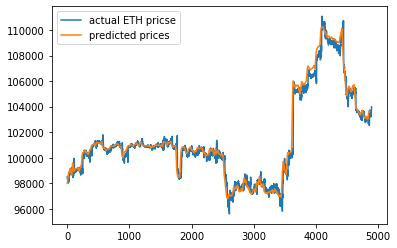

In [28]:
plt.plot(eth_prices, label = 'actual ETH pricse')
plt.plot(prediction_prices, label = 'predicted prices')

plt.legend()
plt.show()

In [29]:
next_data = model_inputs[len(model_inputs)+1 - time_intervals_to_train: len(model_inputs)+1,0]
next_data = np.array(next_data)

In [30]:
next_data.shape

(29,)

In [31]:
next_data = np.reshape(next_data,(1, next_data.shape[0],1))

In [32]:
next_data.shape

(1, 29, 1)

In [33]:
prediction = model.predict(next_data)

1/1 [==============================] - 0s 423ms/step


In [34]:
prediction

array([[0.5158904]], dtype=float32)

In [35]:
prediction = scaler.inverse_transform(prediction)

In [36]:
prediction

array([[103586.484]], dtype=float32)

In [37]:
import pickle

In [42]:
# dirname_pickle = 'drive/My Drive/'

In [41]:
pickle.dump(model,open('drive/My Drive/ETHmodel.pkl','wb'))

In [43]:
pickled_model =  pickle.load(open('drive/My Drive/ETHmodel.pkl','rb'))

In [46]:
pickled_model.predict(scaler.transform(prediction.reshape(1,-1)))

1/1 [==============================] - 0s 34ms/step


array([[0.46770957]], dtype=float32)